<h1>SASSIE SWIFT Data Use and Visualization</h1>
<p> SWIFTs are drifting platforms that take temperature, salinity, meteorological, and wave action measurements as they drift. SWIFT data are downloaded and plotted using the code below! <b>Please run the 'Data Download and Metadata Viewing' and 'Supporting Code' sections in order before running the 'Figure Making Code'.</b> </p>
   <p>The aim of this notebook is to assist the end user in exploratory data analysis by downloading the SASSIE data from NASA's PODAAC, opening the dataset and displaying it's associated metadata, and creating a few visualizations. This notebook was created by Elizabeth Westbrook. For questions and trouble shooting, please email westbrooke@uncw.edu.</p>

# Data Download and Metadata Viewing

The code in this section will download the dataset from PO.DAAC and open it as an xarray object for metadata and variable attribute viewing.

In [1]:
import numpy as np
import xarray as xr
import cf_xarray 
import glob 
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import cartopy
import matplotlib
import os
import sys
import pandas as pd
import requests 

<h2>Download The SWIFT data from PO.DAAC</h2>
<p> All data from the SASSIE campaign is stored on NASA's PO.DAAC. The code in this section of the notebook will download SASSIE SWIFT data from PO.DAAC, which is accessed through earthdata. If you do not already have an earthdata account, you can create one <a href="https://urs.earthdata.nasa.gov/">here</a> . </p>
    <p>Please enter your earthdata credentials below.</p>

In [2]:
username = 'your_username'
password = 'your_password'
earthdata = requests.auth.HTTPBasicAuth(username, password)

##LOCAL DIRECTORY TO SWIFT DATA
dir_in = 'Data/SWIFT/' 

The next block of code creates the directory specified above and downloads the SWIFT files to your binder session if they have not already been downloaded.<b> To download the dataset to your local disk from here, right click on the file you want to download and click 'download'. </b>

In [10]:
##SASSIE DATA DIR
if not os.path.exists(dir_in):
    os.makedirs(dir_in)
deployment_id = ['12_play1','12_play4','12_play5','13_play1','15_play1','15_play4','15_play5','16_play1','16_play3a','16_play3b','16_play4','16_play5','17_play1','17_play3a','17_play3b','17_play4','17_play5']
for ID in deployment_id:
    filename = 'SASSIE_Fall_2022_SWIFT'+ID+'.nc'
    if os.path.isfile(dir_in+filename)==False:
        url = 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/'+filename
        with requests.Session() as session:
                session.auth = (username, password)
                r1 = session.request('get', url)
                r = session.get(r1.url, auth=(username, password))
                if r.status_code == 200:
                    if r.ok:
                        with open(dir_in+filename, 'wb') as f:
                            f.write(r.content) 
                            print('Saving Input File: ' + dir_in+filename) 
                else:
                    print("Error:", r.status_code)
                    if r.status_code == 401:
                        print ('Your Username and/or password are incorrect. Please try again')
    else: 
        print('SWIFT Deployment '+ ID+' file is already in binder directory')
        


https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT15_play5.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT12_play1.nc
Saving Input File: Data/SWIFT/SASSIE_Fall_2022_SWIFT12_play1.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT12_play4.nc
Saving Input File: Data/SWIFT/SASSIE_Fall_2022_SWIFT12_play4.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT12_play5.nc
Saving Input File: Data/SWIFT/SASSIE_Fall_2022_SWIFT12_play5.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT13_play1.nc
Saving Input File: Data/SWIFT/SASSIE_Fall_2022_SWIFT13_play1.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SWIFT_V1/SASSIE_Fall_2022_SWIFT15_play1.nc


<h2> View The Metadata Inside the SWIFT Files</h2>

The netCDF file has global metadata attributes and attributes associated with each variable. This next block will load data and metadata of the netCDF file into an xarray object (ds). <br> The data set will then be displayed in a clickable HTML format. 

In [11]:
print('Displaying just 1/17 SWIFT files')
#See information about the entire dataset:
files = sorted(glob.glob(dir_in + '/*.nc'))
ds = xr.open_dataset(files[0])
ds

Displaying just 1/17 SWIFT files


<xarray.Dataset>
Dimensions:                                  (time: 161, depth: 16,
                                              frequency: 42)
Coordinates:
  * time                                     (time) datetime64[ns] 2022-09-09...
    latitude                                 (time) float64 ...
    longitude                                (time) float64 ...
  * depth                                    (depth) float64 0.62 0.58 ... 0.02
  * frequency                                (frequency) float64 0.009766 ......
Data variables: (12/23)
    air_pressure                             (time) float64 ...
    air_pressure_stddev                      (time) float64 ...
    air_temperature                          (time) float64 ...
    air_temperature_stdev                    (time) float64 ...
    wind_direction                           (time) float64 ...
    wind_direction_stdev                     (time) float64 ...
    ...                                       ...
    wave_energy                              (frequency, time) float64 ...
    spectral_directional_moment_east         (frequency, time) float64 ...
    spectral_directional_moment_north        (frequency, time) float64 ...
    spectral_directional_moment_east_west    (frequency, time) float64 ...
    spectral_directional_moment_north_south  (frequency, time) float64 ...
    turbulent_dissipation_rate               (depth, time) float64 ...
Attributes: (12/54)
    DOI:                           10.5067/SASSIE-SWIFT2
    title:                         SASSIE Arctic Field Campaign SWIFT Data Fa...
    summary:                       Data collected from Surface Wave Instrumen...
    keywords:                      EARTH SCIENCE > OCEANS > OCEAN TEMPERATURE...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    conventions:                   CF-1.8, ACDD-1.3
    ...                            ...
    time_coverage_start:           2022-09-09T21:24:00Z
    time_coverage_end:             2022-09-11T07:00:00Z
    time_coverage_duration:        P01D09H35M59S
    geospatial_vertical_units:     m
    geospatial_vertical_positive:  down
    date_created:                  2023-02-15T11:47:10Z

# Supporting Code 
The code in this section provides a set up for the figure making code below by defining directories for data and figures and creating functions that will be called to actually map the data

<h3>Create a Directory to Save Figures</h3>

In [12]:
#LOCAL DIRECTORY TO SAVE FIGURES
fig_dir ='Figures/SWIFT/'
#FIGURE DIR 
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

<h3>Are you exploring this entire data set, or just the data collected durring a specific time period?</h3>

<p> In order to efficiently accomplish the data collection goals of the SASSIE campaign, the cruise was broken up into five destinct plays. 
    <br>
    <br>Play 1 - Ice and Open Water Survey
    <br>Play 2 - Zig-Zag Open Water Survey 
    <br>Play 3 - Ice Survey
    <br>Play 4 - Drifter-Following Survey Boxes
    <br>Play 5 - Repeated Ice to Open Water Transect</p>
    <p>The following block of code identifies the start and end datetimes of each of these plays, seperates the dataset into subsets for each play, and puts the start dates, end dates, and subseted data into lists for easier acess later. </p>

In [25]:
##Identify the start and end times of each play
play1_start = datetime(2022,9,8,8) 
play1_end = datetime(2022,9,13)
play2_start = datetime(2022,9,14)
play2_end = datetime(2022,9,16)
play3_start = datetime(2022,9,16)
play3_end = datetime(2022,9,18)
play4_start = datetime(2022,9,19)
play4_end  = datetime(2022,9,23)
play5_start = datetime(2022,9,25)
play5_end = datetime(2022,9,29)

<h3>Define a Colormap and Label for Each Variable in the File</h3>
Within SASSIE's collection of jupyter notebooks, the colormaps used for each variable are held as consistant as possible across all datasets. This function defines the colormap and a label for the variable of interest. 

In [26]:
#DEFINES COLORMAPS AND LABELS OF EACH VARIABLE IN THIS DATA SET###
def define_var_attributes(var): 
    if var == 'wave_energy':
        var_label = 'Wave Energy (m$^{2}$/Hz)'
        colormap = 'spring'
    if var == 'spectral_directional_moment_east':
        var_label = 'Eastern Spectral Directional Moment (m$^{2}$/Hz)'
        colormap = 'PiYG'
    if var == 'spectral_directional_moment_north': 
        colormap = 'BrBG'
        var_label = 'Northern Spectral Directional Moment (m$^{2}$/Hz)'
    if var == 'spectral_directional_moment_east_west': 
        colormap = 'PRGn'
        var_label = 'East-West Spectral Directional Moment (m$^{2}$/Hz)'
    if var == 'spectral_directional_moment_north_south': 
        colormap = 'PuOr'
        var_label = 'North-South Spectral Directional Moment (m$^{2}$/Hz)'
    if var == 'turbulent_dissipation_rate':
        var_label = 'Turbulent Dissipation Rate'
        colormap = 'hot'
    if var == 'water_temperature':
        var_label = 'Water Temperature ($^{\circ}$C)'
        colormap = 'plasma'
    if var == 'air_temperature':
        var_label = 'Air Temperature ($^{\circ}$C)'
        colormap = 'magma'
    if var == 'air_pressure':
        var_label = 'Air Pressure (hPa)'
        colormap = 'Blues'
    if var == 'air_pressure_stdev':
        var_label = 'Air Pressure Standard Deviation (hPa)'
        colormap = 'Blues'
    if var == 'salinity':
        var_label = 'Salinity'
        colormap = 'viridis'
    if var == 'surface_wave_height':
        var_label = 'Surface Wave Height (m)'
        colormap = 'autumn'
    if var == 'surface_wave_period':
        var_label = 'Surface Wave Period (s)'
        colormap = 'cool'
    if var == 'surface_wave_direction':
        var_label = 'Surface Wave Direction From North (Degree)'
        colormap = 'twilight'
    if var == 'drift_speed_stdev':
        var_label = 'Drift Speed Standard Deviation (m/s)'
        colormap = 'cividis' 
    if var == 'drift_speed':
        var_label = 'Drift Speed (m/s)'
        colormap = 'cividis' 
    if var == 'drift_direction_stdev':
        var_label = 'Drift Direction from North Standard Deviation (m/s)'
        colormap = 'twilight' 
    if var == 'drift_direction':
        var_label = 'Drift Direction from North (m/s)'
        colormap = 'twilight' 
    if var == 'wind_speed_stdev':
        var_label = 'Wind Speed Standard Deviation (m/s)'
        colormap = 'cividis' 
    if var == 'wind_speed':
        var_label = 'Wind Speed (m/s)'
        colormap = 'cividis'
    if var == 'wind_direction_stdev':
        var_label = 'Wind Direction from North Standard Deviation (Degree)'
        colormap = 'twilight' 
    if var == 'wind_direction':
        var_label = 'Wind Direction from North (Degree)'
        colormap = 'twilight' 
    if var == 'drift_speed_stdev':
        var_label = 'Drift Speed Standard Deviation (m/s)'
        colormap = 'cividis' 
        
    return colormap,var_label

<h3>Define a Function to Create a Map of the Study Area</h3>
The following function creates a map of the SASSIE study area, which is defined by minimum and maximum lat/lon values. These ranges can be changed later when the function is called to zoom in/out on the study area.

In [27]:
def map_study_area(latmin,latmax,lonmin,lonmax):
    
    global fig 
    global ax
    
    #create the map as a figure, set the lat and lon ranges, and add land + river data:
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=cartopy.crs.NorthPolarStereo(central_longitude=-150))
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='k')  
    ax.add_feature(cartopy.feature.LAND, facecolor = '0.50',zorder=1)
    ax.add_feature(cartopy.feature.RIVERS,facecolor='blue')
    #Add lat and lon gridlines and labels:
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3) #draw_labels=True gives lat labels.
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(60,90,1))
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,180,2))
    gl.top_labels = False
    gl.bottom_labels = True 
    gl.right_labels = False
    
    #Add markers for reference cities on the coast:
    if (latmin<71.2906) & (lonmin<-156.7886):
        utqiagvik = ax.scatter(-156.7886,71.2906,s=100,transform=cartopy.crs.PlateCarree(),c='red',marker = '*',label='Utqiagvik, AK',zorder=2)
    if (latmin<70.2002) & (lonmax>-148.4597):
        deadhorse = ax.scatter(-148.4597,70.2002,s=100,c='cyan',transform=cartopy.crs.PlateCarree(),marker = '*',label='Deadhorse, AK',zorder=2)
        

<h3>Configure Supporting Data to Add to Maps</h3>
<p>The functions for viewing and plotting this data set below have options to include bathymetry and/or shiptrack data to add context to maps. If you are using these options, run
    <br>the following code blocks to:
    <br>1. Create a directory for SASSIE Ship Track data and acess bathymetry data from NOAA
    <br>2. Define functions that add these data to your map when called.</p>

<h4>Create Directory for Shiptrack Data and Access Bathymetry Data </h4>

In [29]:
## DIRECTORY TO SHIP TRACK DATA
ship_dir =  'Data/TSG/' 

#DOWLOAD SHIPTRACK DATA
if not os.path.isfile(ship_dir+'SASSIE_Fall_2022_Shipboard_TSG.nc'):
    os.makedirs(ship_dir)
    url = 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SASSIE_L2_SHIPBOARD_TSG_V1/SASSIE_Fall_2022_Shipboard_TSG.nc'
    with requests.Session() as session:
            session.auth = (username, password)
            r1 = session.request('get', url)
            r = session.get(r1.url, auth=(username, password))
            if r.status_code == 200:
                if r.ok:
                    with open(ship_dir+'SASSIE_Fall_2022_Shipboard_TSG.nc', 'wb') as f:
                        f.write(r.content) 
                        print('Saving Input File: ' + ship_dir+'SASSIE_Fall_2022_Shipboard_TSG.nc') 
            else:
                print("Error:", r.status_code)
                if r.status_code == 401:
                    print ('Your Username and/or password are incorrect. Please try again')
else: 
    print('Shipboard TSG file is already in local directory')
    

Shipboard TSG file is already in local directory


<h4>Define a Function to Index Relevant Bathymetry Data and Add it to the Map</h4>
This function will index bathymetry data from NOAA within the appropriate spatial range and add it to the map. 


In [30]:
#READ IN TOPOGRAPHY/BATHYMETRY DATA
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo2.nc'
etopodata = xr.open_dataset(url) 

def add_bathy_data(latmin,latmax,lonmin,lonmax):
        topoin = etopodata.rose.values[0:-1:5,1:-1:5]
        lons = etopodata.etopo2_x.values[0:-1:5]
        lats = etopodata.etopo2_y.values[0:-1:5]
        lons_in_range = lons[np.where((lons >lonmin-1) & (lons<lonmax+1))]
        lats_in_range = lats[np.where((lats >latmin-1) & (lats<latmax+1))]
        topo_in_range = np.squeeze(topoin[np.squeeze(np.where((lats >latmin-1) & (lats<latmax+1))),:][:,np.where((lons >lonmin-1) & (lons<lonmax+1))])
        [bathy_lon,bathy_lat] = np.meshgrid(lons_in_range,lats_in_range)
        
        bathy = ax.contour(bathy_lon,bathy_lat,topo_in_range,np.arange(-6000,-1000,300),transform=cartopy.crs.PlateCarree(),cmap='gray',alpha = 0.2,zorder = 0)

<h4>Define a Function to Add Shiptrack Data to a Map</h4>
This function will pull the lat/lon data from the SASSIE Shipboard TSG file and put it onto a map. 

In [31]:
def add_ship_track():
        ds_ship = xr.open_dataset(ship_dir+'/SASSIE_Fall_2022_Shipboard_TSG.nc')
        ship_time = np.squeeze(ds_ship['time'])
        ship_lat = np.squeeze(ds_ship['latitude'])
        ship_lon = np.squeeze(ds_ship['longitude'])
       
        track = ax.plot(ship_lon, 
                     ship_lat,linewidth = 0.5,
                     c='black',
                       transform=cartopy.crs.PlateCarree(),label = 'Ship Track',zorder=1)

<h4>Define a Function to Add Ice Data to a Map</h4>
This function will download the AMSR ice product at the start and end date of the time period specified and add it to the plot. 
<br>Ice data from the start date will be shown in blue and ice data from the end date will be shown in red. 

In [32]:
##LOCAL DIRECTORY TO SAVE AMSR SEA ICE DATA 
ice_dir = 'Ice_Data/'

#ICE DATA DIR
if not os.path.exists(ice_dir):
    os.makedirs(ice_dir)


def add_ice_data(start_date,end_date):
        #get ice data at start of time range
        play_start = start_date
        filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(play_start.year)+str(play_start.month).zfill(2)+str(play_start.day).zfill(2)+'.he5' 
        i=0
        time_tmp=play_start - timedelta(days=i)
        while os.path.isfile(ice_dir+filename_si)==False and i<15:
            time_tmp=play_start - timedelta(days=i)
            filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(time_tmp.year)+str(time_tmp.month).zfill(2)+str(time_tmp.day).zfill(2)+'.he5'
            url = requests.get('https://n5eil01u.ecs.nsidc.org/AMSA/AU_SI12.001/'+str(time_tmp.year)+'.'+str(time_tmp.month).zfill(2)+'.'+str(time_tmp.day).zfill(2)+'/'+filename_si)
            with open(ice_dir+filename_si, 'wb') as f:
                f.write(url.content)
            i=i+1
            

        #get ice data at end of time range 
        play_end = end_date
        filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(play_end.year)+str(play_end.month).zfill(2)+str(play_end.day).zfill(2)+'.he5' 
        i=0
        time_tmp=play_end - timedelta(days=i)
        while os.path.isfile(ice_dir+filename_si)==False and i<15:
            time_tmp=play_end - timedelta(days=i)
            filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(time_tmp.year)+str(time_tmp.month).zfill(2)+str(time_tmp.day).zfill(2)+'.he5'
            url = requests.get('https://n5eil01u.ecs.nsidc.org/AMSA/AU_SI12.001/'+str(time_tmp.year)+'.'+str(time_tmp.month).zfill(2)+'.'+str(time_tmp.day).zfill(2)+'/'+filename_si)
            with open(ice_dir+filename_si, 'wb') as f:
                f.write(url.content)       
            i=i+1

            
        #apply ice data at the end of the time range (ice sheet growth) in red
        filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(play_end.year)+str(play_end.month).zfill(2)+str(play_end.day).zfill(2)+'.he5' 
        if os.path.isfile(ice_dir+filename_si):
            dsc = xr.open_dataset(ice_dir+filename_si,group='HDFEOS/GRIDS/NpPolarGrid12km')
            dsd = xr.open_dataset(ice_dir+filename_si,group='HDFEOS/GRIDS/NpPolarGrid12km/Data Fields') 
            var1 = np.array(dsd.SI_12km_NH_ICECON_DAY.squeeze().values)
            indx = np.where((var1==120) | (var1==0))

            var1[indx] = 0
            ice_growth_location = np.ma.masked_where(var1==0,var1)

            pp = ax.pcolormesh(dsc.lon,dsc.lat,ice_growth_location, 
                            vmin=0,vmax=100, # Set max and min values for plotting
                            cmap='Reds_r', shading='auto',   # shading='auto' to avoid warning
                            transform=cartopy.crs.PlateCarree())
            

        #apply ice data at the start of the time range in blue
        filename_si='AMSR_U2_L3_SeaIce12km_B04_'+str(play_start.year)+str(play_start.month).zfill(2)+str(play_start.day).zfill(2)+'.he5' 
        if os.path.isfile(ice_dir+filename_si):
            dsc = xr.open_dataset(ice_dir+filename_si,group='HDFEOS/GRIDS/NpPolarGrid12km')
            dsd = xr.open_dataset(ice_dir+filename_si,group='HDFEOS/GRIDS/NpPolarGrid12km/Data Fields') 
            var1 = np.array(dsd.SI_12km_NH_ICECON_DAY.squeeze().values)
            indx = np.where((var1==120) | (var1==0))
            var1[indx] = 0
            ice_location = np.ma.masked_where(var1==0,var1)

            pp = ax.pcolormesh(dsc.lon,dsc.lat,ice_location, 
                            vmin=0,vmax=100, # Set max and min values for plotting
                            cmap='Blues_r', shading='auto',   # shading='auto' to avoid warning
                            transform=cartopy.crs.PlateCarree())
        

# Figure Making Code 

The code in this section will make basic visualizations of the SASSIE dataset you have downloaded. Expand for more details. 

<h2>Make Maps of This Data</h2>
<p>Using the code in this section, the user can plot the SWIFT data on a map colored by time, SWIFT number, or some other surface variable that was collected. The code blocks in the 'supporting code' section should be run first. </p>

<h3> Mapping the Time and Location of SWIFT Data Collection</h3>

<p>The map_SWIFT function shows the track of the SWIFTs on a map, colored by time. Various features of this function: </p>
    <p>1. This function adds the track of the R/V Woldstad for reference
    <br>2. This function adds bathymetry contours showing the position of the continental shelf by default for reference. 
    <br>3. The user has the option to add the AMSR ice product at the start and end of the time period shown by inputting ice_data=True. </p>

In [37]:
##USE THIS TO PLOT THE SWIFT TRACKS ON THE WHOLE CAMPAIGN MAP, COLORED BY TIME  
def map_SWIFT(ship_track=True,bathymetry_data=True,ice_data=False):
    
    ##CREATE A MAP WITH LAND AND CITY MARKERS AND SHIP TRACK  
    latmin = 70
    latmax =74
    lonmin=-157
    lonmax=-144
    
    #make the map
    map_study_area(latmin,latmax,lonmin,lonmax)

    #give it a title
    ax.set_title('SWIFT Tracks',fontsize=22,pad=1) 

    
    ##OPTIONAL MAP ADD-ONs
    if ship_track==True:
        #ADD SHIP TRACK DATA
        add_ship_track()
        
    if bathymetry_data == True:    
        ##ADD BATHYMETRY DATA
        add_bathy_data(latmin,latmax,lonmin,lonmax)
        
    if ice_data==True:
        ##ADD ICE DATA
        start_time = pd.to_datetime(xr.open_dataset(files[0])['time'].values[0],'ns')
        end_time = pd.to_datetime(xr.open_dataset(files[-1])['time'].values[-1],'ns')
        
        add_ice_data(start_time,end_time)

    ##APPLY THE TIME AND LOCATION DATA IN EACH SWIFT FILE 
    for file in files:
        ds_swift = xr.open_dataset(file)
        swift_time = np.squeeze(ds_swift['time'])
        swift_lat = np.squeeze(ds_swift['latitude'])
        swift_lon = np.squeeze(ds_swift['longitude']) 
        
        casts = ax.scatter(swift_lon,swift_lat,s = 1,c = swift_time,cmap = 'jet',transform=cartopy.crs.PlateCarree(),zorder=2,vmin=1.6626E18,vmax=1.6647E18)
        
    
    #CONFIGURE COLORBAR                   
    cbar = fig.colorbar(casts, ax=ax, orientation="horizontal", pad=0.1)
    cbar.set_label(label='Date',size='large',weight='bold')
    cbar_tick_array=(np.linspace(xr.open_dataset(files[0])['time'].values[0].astype('int64'),xr.open_dataset(files[-1])['time'].values[-1].astype('int64'),5))
    cbar.set_ticks(cbar_tick_array)
    cbar.set_ticklabels(pd.to_datetime(cbar_tick_array).date)
        
    ##SAVE THE FIGURE 
    if not os.path.exists(fig_dir+'/tracks'):
        os.makedirs(fig_dir+'/tracks')
    
    print('Saving Output Image:  '+fig_dir+'/tracks/SWIFT_track_map.png')
    plt.savefig(fig_dir+'/tracks/SWIFT_track_map.png',dpi='figure',format='png')

Saving Output Image:  Figures/SWIFT//tracks/SWIFT_track_map.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


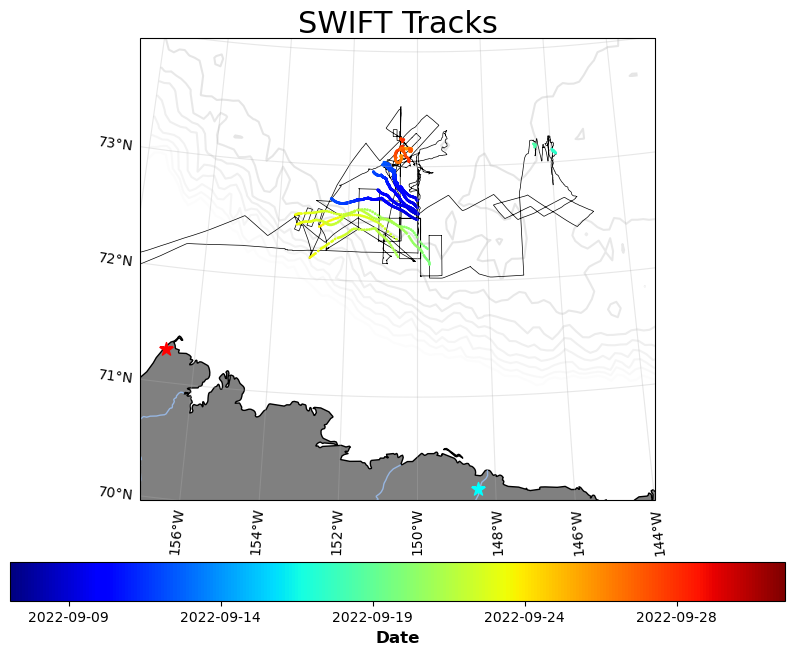

In [38]:
map_SWIFT()

<h3> Mapping the Location of individual SWIFTs throughout the campaign</h3>

<p>The map_SWIFT_by_number function shows the track of the SWIFTs on a map, colored by SWIFT number. Various features of this function: </p>
    <p>1. This function adds the track of the R/V Woldstad for reference
    <br>2. This function adds bathymetry contours showing the position of the continental shelf by default for reference. 
    <br>3. The user has the option to add the AMSR ice product at the start and end of the time period shown by inputting ice_data=True. </p>

In [41]:
##USE THIS TO PLOT THE SWIFT TRACKS ON THE WHOLE CAMPAIGN MAP, COLORED BY SWIFT NUMBER  
def map_SWIFT_by_number(ship_track=True,bathymetry_data=True,ice_data=False):
    
    ##CREATE A MAP WITH LAND AND CITY MARKERS AND SHIP TRACK  
    latmin = 70
    latmax =74
    lonmin=-157
    lonmax=-144
    
    
    #make the map: 
    map_study_area(latmin,latmax,lonmin,lonmax)
    
    #give it a title:
    ax.set_title('SWIFT Tracks',fontsize=22,pad=1) 
    
    
    ##OPTIONAL MAP ADD-ONs
    if ship_track==True:
        add_ship_track()
        
    if bathymetry_data == True:    
        add_bathy_data(latmin,latmax,lonmin,lonmax)
        
    if ice_data==True:
        ##ADD ICE DATA
        start_time = pd.to_datetime(xr.open_dataset(files[0])['time'].values[0],'ns')
        end_time = pd.to_datetime(xr.open_dataset(files[-1])['time'].values[-1],'ns')
        add_ice_data(start_time,end_time)
        
    for file in files:
        ds_swift = xr.open_dataset(file)
        swift_lat = np.squeeze(ds_swift['latitude'])
        swift_lon = np.squeeze(ds_swift['longitude'])
        if file[(len(file)-5)] == '3':
            swift_number = file[(len(file)-12):(len(file)-10)]
        else:
            swift_number = file[(len(file)-11):(len(file)-9)]
        if swift_number == '12':
            color = 'blue'
        if swift_number == '13':
            color = 'magenta'
        if swift_number == '15': 
            color = 'green'
        if swift_number == '16':
            color = 'red'
        if swift_number == '17':
            color = 'cyan'
        ax.plot(swift_lon, 
                swift_lat,linewidth = 4,
                c=color,
                transform=cartopy.crs.PlateCarree(),label = 'SWIFT '+swift_number,zorder=1)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    ##SAVE THE FIGURE 
    if not os.path.exists(fig_dir+'tracks'):
        os.makedirs(fig_dir+'tracks')
    
    print('Saving Output Image:  '+fig_dir+'tracks/SWIFT_track_by_number_map.png')
    plt.savefig(fig_dir+'tracks/SWIFT_track_by_number_map.png',dpi='figure',format='png')

Saving Output Image:  Figures/SWIFT/tracks/SWIFT_track_by_number_map.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


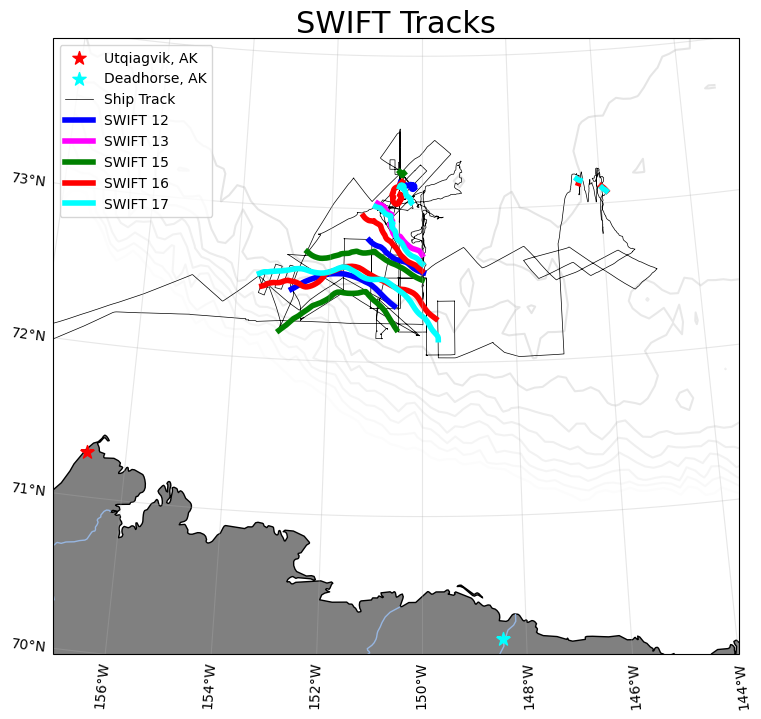

In [42]:
map_SWIFT_by_number()

<h3>Mapping Sea Surface Variable SWIFT Data Along the Ship Track</h3>

<p>The plot_swift_track function shows the track of the the SWIFTs on a map, colored by a surface variable the SWIFTs collected. Various features of this function: </p>
    <p>1. This function adds the track of the R/V Woldstad for reference
    <br>2. This function adds bathymetry contours showing the position of the continental shelf by default for reference. 
    <br>3. The user has the option to add the AMSR ice product at the start and end of the time period shown by inputting ice_data=True.
    <br>4. The user must specify which swifts to show, which play to show, which variable to be plotted, and the minimum and maximum value for that variable.</p>

In [43]:
##USE THIS TO PLOT SWIFT TRACK with Surface Variable (no depth or frequency dimension) 
def plot_swift_track(swift_numbers,play,var,var_min,var_max,ship_track=True,bathymetry_data=True,ice_data=False):
    
    #GET LAT AND LON RANGE OF SWIFTS
    if play !='all':
        file = dir_in+'SASSIE_Fall_2022_SWIFT'+str(swift_numbers[0])+'_play'+str(play)+'.nc'
        ds = xr.open_dataset(file,engine='netcdf4')
        SWIFT_lat = ds['latitude']
        SWIFT_lon = ds['longitude']

        
    ##CREATE A MAP WITH LAND AND CITY MARKERS
    #To show the whole campaign area, use latmin = 70, latmax =74,lonmin=-157,lonmax=-140
    if (play ==1):
        latmin = min(SWIFT_lat.values)-0.1
        latmax = max(SWIFT_lat.values)+0.3
        lonmin = min(SWIFT_lon.values)-1.5
        lonmax = max(SWIFT_lon.values)+0.1
        start_time = play1_start
        end_time=play1_end
    if (play == '3a') | (play =='3b')|(play==5):
        latmin = min(SWIFT_lat.values)-0.1
        latmax = max(SWIFT_lat.values)+0.1
        lonmin = min(SWIFT_lon.values)-0.1
        lonmax = max(SWIFT_lon.values)+0.1 
        start_time = play3_start
        end_time = play3_end
    if (play==4):
        latmin = min(SWIFT_lat.values)-0.3
        latmax = max(SWIFT_lat.values)+0.1
        lonmin = min(SWIFT_lon.values)-0.9
        lonmax = max(SWIFT_lon.values)+1
        start_time = play4_start
        end_time = play4_end
    if (play==5):
        latmin = min(SWIFT_lat.values)-0.1
        latmax = max(SWIFT_lat.values)+0.1
        lonmin = min(SWIFT_lon.values)-0.3
        lonmax = max(SWIFT_lon.values)+0.1
        start_time = play5_start
        end_time = play5_end
    if play =='all':
        latmin = 71.9
        latmax =73.5
        lonmin=-154
        lonmax=-145
        start_time = play1_start
        end_time = play5_end
    [colormap,var_label] = define_var_attributes(var)
      
    #make the map
    map_study_area(latmin,latmax,lonmin,lonmax)
    
    #give it a title
    if play == 'all':
        ax.set_title('SWIFT '+var_label+' Readings from Entire Campaign',fontsize=15)
    else:
        if len(swift_numbers)>1:
            ax.set_title('SWIFT '+var_label+' Readings from Play '+str(play),fontsize=15)
        if len(swift_numbers) == 1:
            ax.set_title('SWIFT '+str(swift_numbers[0])+' '+var_label+'Readings from Play'+str(play),fontsize=15)
    
    ##OPTIONAL MAP ADD-ONs
    if ship_track==True:
        #ADD SHIP TRACK DATA
         add_ship_track()
        
    if bathymetry_data == True:    
        ##ADD BATHYMETRY DATA
        add_bathy_data(latmin,latmax,lonmin,lonmax)
        
    if ice_data==True:
        ##ADD ICE DATA
        add_ice_data(start_time,end_time)
    
    ##APPLY SWIFT DATA 
    if play == 'all': 
         for file in files:
            ds = xr.open_dataset(file,engine='netcdf4')
            SWIFT_lat = ds['latitude']
            SWIFT_lon = ds['longitude']
            SWIFT_time = ds['time']
            SWIFT_var = ds[var]

            swift_track = ax.scatter(SWIFT_lon, 
                         SWIFT_lat,s=5, 
                         c=SWIFT_var,cmap=colormap,
                           transform=cartopy.crs.PlateCarree(),
                              vmin = var_min,
                              vmax = var_max,zorder = 2)
            swift_start = ax.scatter(SWIFT_lon[0], 
                        SWIFT_lat[0],s=40, 
                        c='black',
                         transform=cartopy.crs.PlateCarree(),zorder = 3)
            swift_end = ax.scatter(SWIFT_lon[-1], 
                        SWIFT_lat[-1],s=120, 
                        c='black',marker = '*',
                         transform=cartopy.crs.PlateCarree(),zorder = 3)
    else:
        for swift in swift_numbers:
            file = dir_in+'SASSIE_Fall_2022_SWIFT'+str(swift)+'_play'+str(play)+'.nc'
            ds = xr.open_dataset(file,engine='netcdf4')
            SWIFT_lat = ds['latitude']
            SWIFT_lon = ds['longitude']
            SWIFT_time = ds['time']
            SWIFT_var = ds[var]

            swift_track = ax.scatter(SWIFT_lon, 
                         SWIFT_lat,s=5, 
                         c=SWIFT_var,cmap=colormap,
                           transform=cartopy.crs.PlateCarree(),
                              vmin = var_min,
                              vmax = var_max,zorder = 2)

            swift_start = ax.scatter(SWIFT_lon[0], 
                        SWIFT_lat[0],s=40, 
                        c='black',
                         transform=cartopy.crs.PlateCarree(),zorder = 3)
            swift_end = ax.scatter(SWIFT_lon[-1], 
                        SWIFT_lat[-1],s=120, 
                        c='black',marker = '*',
                         transform=cartopy.crs.PlateCarree(),zorder = 3)
            if play ==1:
                ax.text((SWIFT_lon[-1]-0.2),SWIFT_lat[-1]+0.02,s='Swift '+str(swift),transform=cartopy.crs.PlateCarree())
            if play=='3a':
                ax.text((SWIFT_lon[-1]-0.1),SWIFT_lat[-1]+0.0,s='Swift '+str(swift),transform=cartopy.crs.PlateCarree())
            if (play=='3b')|(play==5):
                ax.text((SWIFT_lon[-1]-0),SWIFT_lat[-1]+0.0,s='Swift '+str(swift),transform=cartopy.crs.PlateCarree())
            if play==4:
                ax.text((SWIFT_lon[-1]-0),SWIFT_lat[-1]-0.05,s='Swift '+str(swift),transform=cartopy.crs.PlateCarree())

    matplotlib.pyplot.colorbar(swift_track, ax=ax, orientation="horizontal", pad=0.1).set_label(label=var_label,size='large',weight='bold')
    
    #SAVE FIGURE
    if not os.path.exists(fig_dir+var):
        os.makedirs(fig_dir+var)
    if len(swift_numbers)>1:
        print('Saving Output Image:  '+fig_dir+var+'/SWIFT_play_'+str(play)+'_'+var+'.png')
        plt.savefig(fig_dir+var+'/SWIFT_play_'+str(play)+'_'+var+'.png',dpi='figure',format='png')
    if len(swift_numbers) == 1: 
        print('Saving Output Image:  '+fig_dir+var+'/SWIFT_'+str(swift_numbers[0])+'_play_'+str(play)+'_'+var+'.png')
        plt.savefig(fig_dir+var+'/SWIFT_play_'+str(play)+'_'+var+'.png',dpi='figure',format='png')
    
    
    

Saving Output Image:  Figures/SWIFT/water_temperature/SWIFT_play_all_water_temperature.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  Figures/SWIFT/salinity/SWIFT_play_all_salinity.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


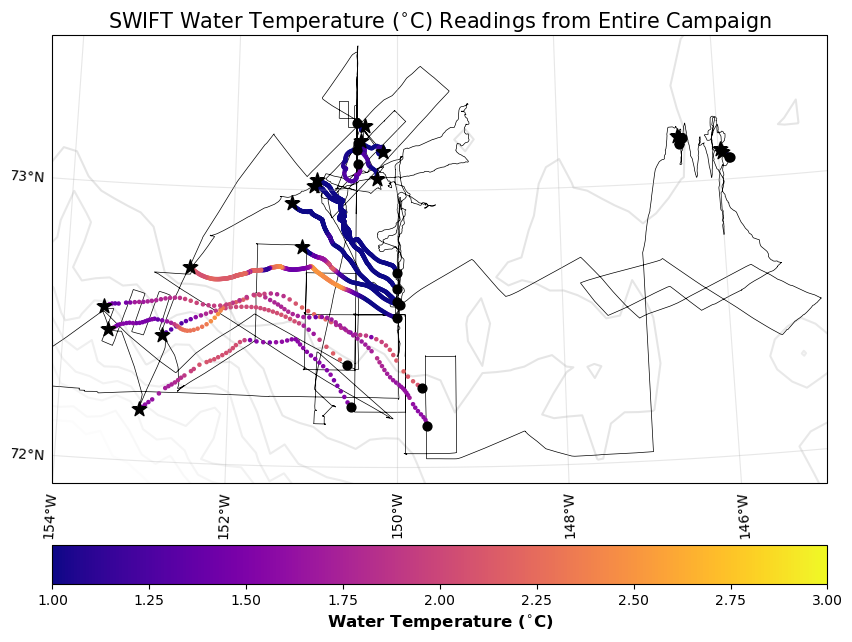

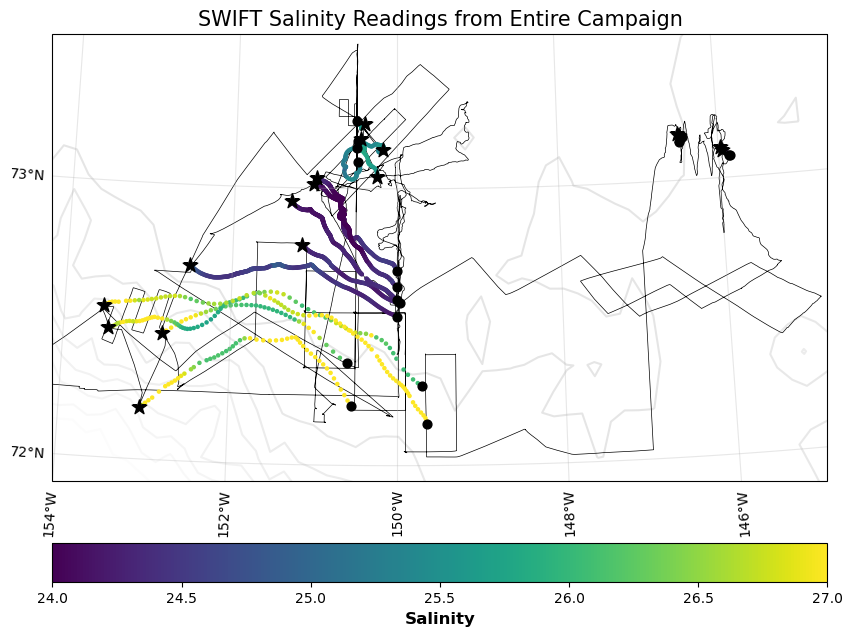

In [44]:
plot_swift_track([12,13,15,16,17],'all','water_temperature',1,3)
plot_swift_track([12,13,15,16,17],'all','salinity',24,27)

<h2>Spectrograms of Wave Action Data</h2>
Use the code in this section to plot the spectrogram of a wave action variable of a selected SWIFT deployment on a 2D grid. The user must select a deployment based on SWIFT number and play. The SWIFT numbers were
<ul><li>12 (deployed in plays 1,4, and 5)</li>
    <li>13 (deployed in play 1 only)</li>
    <li>15 (deployed in plays 1,4, and 5)</li>
    <li>16 (deployed in plays 1, 3a, 3b, 4, and 5)</li>
    <li>17 (deployed in plays 1, 3a, 3b, 4, and 5)</li></ul>

In [45]:
##USE THIS TO PLOT SWIFT SPECTRAL DENSITY ON A SPECTROGRAM
def plot_swift_spectrogram(swift_number,play,var,var_min,var_max):
    ##SWIFT DATA
    file = dir_in+'SASSIE_Fall_2022_SWIFT'+str(swift_number)+'_play'+str(play)+'.nc'
    ds = xr.open_dataset(file,engine='netcdf4')
    SWIFT_time = ds['time']
    SWIFT_freq = ds['frequency']
    SWIFT_var = np.log10(ds[var].values)


    [colormap,var_label] = define_var_attributes(var)
    
    levels = np.linspace(var_min, var_max, 25)
    
    fig,axs = plt.subplots(1)

    contour = axs.contourf(SWIFT_freq,SWIFT_time,np.transpose(np.squeeze(SWIFT_var)),levels,cmap=colormap,vmin = var_min,vmax = var_max)
    plt.xlim(min(SWIFT_freq), max(SWIFT_freq));
    plt.xlabel('Frequency (Hz)',fontsize=12)
    plt.ylabel('Date',fontsize=12)
    fig.colorbar(mappable = contour,label = 'log('+var_label+')',ticks = np.arange(var_min,var_max,1))
    y_tick_array=(np.linspace(min(SWIFT_time.values).astype('int64'),max(SWIFT_time.values).astype('int64'),5))
    axs.set_yticks(pd.to_datetime(y_tick_array).date)
    plt.ylim(min(SWIFT_time),max(SWIFT_time))
    plt.title('SWIFT '+str(swift_number)+' '+var_label+' '+'Readings from Play'+' '+str(play),fontsize=12,pad=None)

    #SAVE FIGURE
    if not os.path.exists(fig_dir+var):
        os.makedirs(fig_dir+var)
    print('Saving Output Image:  '+fig_dir+var+'/'+'SWIFT'+str(swift_number)+'play'+str(play)+'_'+var+'spectrogram.png')
    plt.savefig(fig_dir+var+'/'+'SWIFT'+str(swift_number)+'play'+str(play)+'_'+var+'spectrogram.png',dpi='figure',format='png',bbox_inches='tight')

    

Saving Output Image:  Figures/SWIFT/wave_energy/SWIFT15play1_wave_energyspectrogram.png


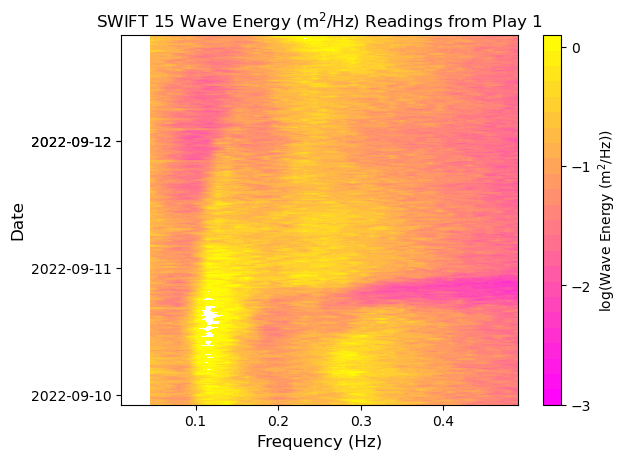

In [46]:
plot_swift_spectrogram(15,1,'wave_energy',-3,0.1)

<h2>Make Timeseries Plots on a 2D Axis</h2>
The function in this section plots tthree selected variables from selected SWIFTS (default all) during selected plays (default all) on a three panneled time series figure.

In [47]:
#For making a time series of surface level variables only. 
def plot_swift_timeseries(var1,var2,var3,swift_number='all',play='all'): 
    [colormap,var1_label] = define_var_attributes(var1)
    [colormap,var2_label] = define_var_attributes(var2)
    [colormap,var3_label] = define_var_attributes(var3)
    
    #MAKE A THREE PANELED TIME SERIES PLOT
    fig,axs = plt.subplots(3,sharex=True)
    
    ##LOAD AND APPLY SWIFT DATA
    if (swift_number=='all') & (play =='all'):
        files = sorted(glob.glob(dir_in+'SASSIE_Fall_2022_SWIFT*_play*.nc'))
        title_end = 'All SWIFTs Durring All Plays'
    elif swift_number == 'all':
        files  = sorted(glob.glob(dir_in+'SASSIE_Fall_2022_SWIFT*_play'+str(play)+'.nc'))
        title_end = 'All SWIFTs, Play '+str(play)
    elif play =='all':
        files  = sorted(glob.glob(dir_in+'SASSIE_Fall_2022_SWIFT'+str(swift_number)+'_play*.nc'))
        title_end = 'SWIFT '+str(swift_number)+' Durring All Plays'
    else:
        files = sorted(glob.glob(dir_in+'SASSIE_Fall_2022_SWIFT'+str(swift_number)+'_play'+str(play)+'.nc'))
        title_end = 'SWIFT '+str(swift_number)+' Play '+str(play)
    for file in files:
        ds = xr.open_dataset(file)
        time_data = ds['time']
        var1_data = ds[var1]
        var2_data = ds[var2]
        var3_data = ds[var3]
        
        
        if file[(len(file)-5)] == '3':
            swift_id = file[(len(file)-12):(len(file)-10)]
        else:
            swift_id = file[(len(file)-11):(len(file)-9)]
        
        if swift_id == '12':
            color = 'blue'
        if swift_id == '13':
            color = 'magenta'
        if swift_id == '15':
            color = 'green'
        if swift_id == '16':
            color = 'red'
        if swift_id == '17':
            color = 'cyan'

        axs[0].plot(time_data,var1_data,linewidth=0.4,c=color,label = 'SWIFT'+str(swift_id))
        axs[0].set_ylabel(var1_label,fontsize=8)
        axs[1].plot(time_data,var2_data,linewidth=0.4,c=color)
        axs[1].set_ylabel(var2_label,fontsize=8)
        axs[2].plot(time_data,var3_data,linewidth=0.4,c=color)
        axs[2].set_ylabel(var3_label,fontsize=8)
        axs[2].set_ylim(0,14)
    
    if play == 'all':
        plt.xticks(pd.date_range(start=datetime(2022,9,8,8),end=datetime(2022,9,29),periods=3))
    else: 
        plt.xticks(pd.date_range(start=time_data.values[0],end=time_data.values[-1],periods=3))

    
    axs[2].set(xlabel = 'Date')
    fig.suptitle(var1_label+', '+var2_label+', and '+var3_label+' Data from '+title_end,fontsize=10)
    
    #Ideal location for legend may vary depending on which data is plotted 
    handles, labels = axs[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),ncol=5,fontsize=7)
    

    
    ##SAVE FIGURE 
    if not os.path.exists(fig_dir+'/timeseries'):
        os.makedirs(fig_dir+'/timeseries')
    print('Saving Output Image:  '+fig_dir+'/timeseries/SWIFT'+str(swift_number)+'_Play'+str(play)+'_'+var1+'_'+var2+'_'+var3+'.png')
    plt.savefig(fig_dir+'/timeseries/SWIFT'+str(swift_number)+'_Play'+str(play)+'_'+var1+'_'+var2+'_'+var3+'.png',dpi='figure',format='png',bbox_inches='tight')
    

Saving Output Image:  Figures/SWIFT//timeseries/SWIFT16_Play1_salinity_water_temperature_wind_speed.png


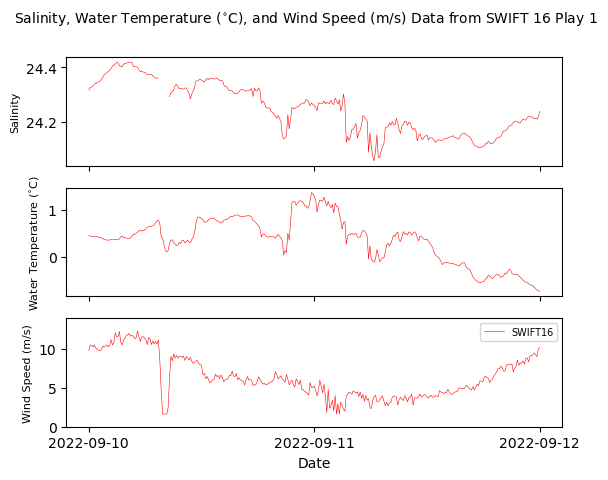

In [48]:
plot_swift_timeseries('salinity','water_temperature','wind_speed',16,1)

Saving Output Image:  Figures/SWIFT//timeseries/SWIFT16_Playall_salinity_water_temperature_wind_speed.png


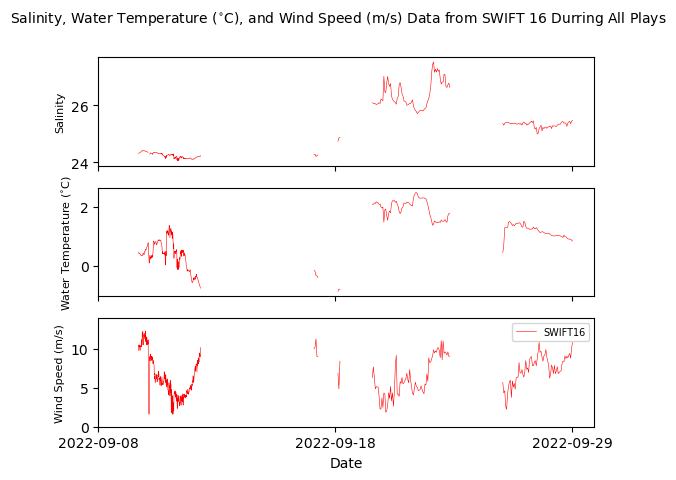

In [49]:
plot_swift_timeseries('salinity','water_temperature','wind_speed',16)

Saving Output Image:  Figures/SWIFT//timeseries/SWIFTall_Playall_salinity_water_temperature_wind_speed.png


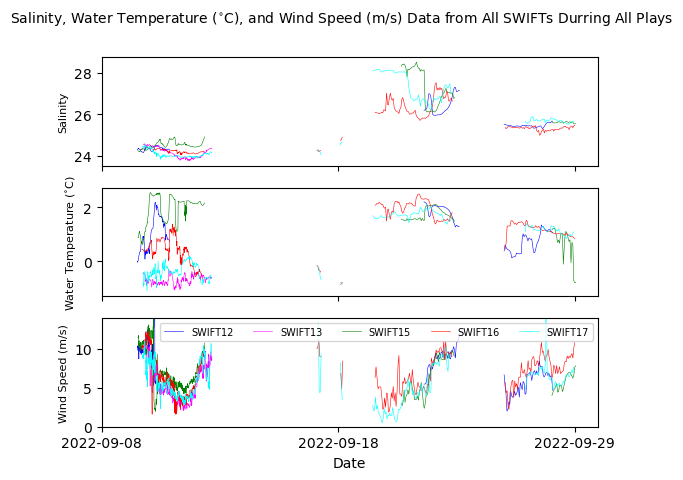

In [50]:
plot_swift_timeseries('salinity','water_temperature','wind_speed')